In [9]:
#importing libraries

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

df = pd.read_csv('processed_data/HAR_cleaned.csv')
df.head()

,timestamp,activityID,IMUH_temp,IMUH_acc1,IMUH_acc2,IMUH_acc3,IMUH_gyr1,IMUH_gyr2,IMUH_gyr3,IMUH_mag1,IMUH_mag2,IMUH_mag3,IMUC_temp,IMUC_acc1,IMUC_acc2,IMUC_acc3,IMUC_gyr1,IMUC_gyr2,IMUC_gyr3,IMUC_mag1,IMUC_mag2,IMUC_mag3,IMUA_temp,IMUA_acc1,IMUA_acc2,IMUA_acc3,IMUA_gyr1,IMUA_gyr2,IMUA_gyr3,IMUA_mag1,IMUA_mag2,IMUA_mag3,subjectID
0,37.66,1,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,-67.9326,-19.9755,32.1875,0.124482,9.65003,-1.65181,0.036668,0.016559,-0.052791,0.567566,-50.7269,44.2728,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,subject101
1,37.67,1,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,-67.9584,-20.9091,32.1875,0.200711,9.64980,-1.65043,0.019343,-0.024304,-0.059843,0.904990,-50.5080,43.5427,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,subject101
2,37.68,1,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,-67.4017,-19.5083,32.1875,0.270277,9.72331,-1.88174,-0.001428,0.038466,-0.046464,0.455480,-50.7209,44.0259,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,subject101
3,37.69,1,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,-67.4387,-20.5602,32.1875,0.236737,9.72447,-1.72746,0.017277,-0.048547,-0.074946,0.324284,-50.1544,43.6570,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,subject101
4,37.70,1,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,-67.1825,-20.0857,32.1875,0.352225,9.72437,-1.68665,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.9228,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,subject101


In [10]:
df.shape

(1921431, 33)

FEATURE SELECTION:

In [11]:
df.columns.values

array(['timestamp', 'activityID', 'IMUH_temp', 'IMUH_acc1', 'IMUH_acc2',
       'IMUH_acc3', 'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag1',
       'IMUH_mag2', 'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1', 'IMUC_acc2',
       'IMUC_acc3', 'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUC_mag1',
       'IMUC_mag2', 'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1', 'IMUA_acc2',
       'IMUA_acc3', 'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3', 'IMUA_mag1',
       'IMUA_mag2', 'IMUA_mag3', 'subjectID'], dtype=object)

In [12]:

#Drop the columns that are not required
columns_to_drop = ['subjectID','timestamp']
df = df.drop(columns=columns_to_drop)

#separate the features from the target variable
X = df.drop(['activityID'], axis = 1)
y = df['activityID']

In [13]:
df.columns.values

array(['activityID', 'IMUH_temp', 'IMUH_acc1', 'IMUH_acc2', 'IMUH_acc3',
       'IMUH_gyr1', 'IMUH_gyr2', 'IMUH_gyr3', 'IMUH_mag1', 'IMUH_mag2',
       'IMUH_mag3', 'IMUC_temp', 'IMUC_acc1', 'IMUC_acc2', 'IMUC_acc3',
       'IMUC_gyr1', 'IMUC_gyr2', 'IMUC_gyr3', 'IMUC_mag1', 'IMUC_mag2',
       'IMUC_mag3', 'IMUA_temp', 'IMUA_acc1', 'IMUA_acc2', 'IMUA_acc3',
       'IMUA_gyr1', 'IMUA_gyr2', 'IMUA_gyr3', 'IMUA_mag1', 'IMUA_mag2',
       'IMUA_mag3'], dtype=object)

DATA STANDARIDATION

In [14]:

from sklearn.preprocessing import StandardScaler

#standardize the features
scaler = StandardScaler()
#remove column names to avoid error
df_scaled = pd.DataFrame(scaler.fit_transform(X))

df_scaled


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-1.332554,1.147142,0.683185,0.498551,-0.004316,-0.002154,-0.004976,-0.507990,-2.227348,0.221872,-2.674893,-0.118535,0.307922,-0.043563,0.069497,0.009231,-0.093020,-0.231065,-1.146523,1.837334,-2.714112,0.054410,-0.217374,0.687380,-0.004614,0.009916,0.000113,-1.609176,-1.764083,-3.828141
1,-1.332554,1.159444,0.595023,0.538251,-0.130228,-0.014866,-0.003967,-0.480653,-2.228413,0.175452,-2.674893,-0.074750,0.307875,-0.043274,0.030836,-0.063283,-0.115332,-0.211290,-1.134062,1.803560,-2.714112,0.048110,-0.222155,0.657724,0.011415,0.055166,0.002249,-1.597396,-1.738996,-3.827938
2,-1.332554,1.159274,0.517883,0.558147,-0.180402,-0.029854,0.002547,-0.502819,-2.205437,0.245102,-2.674893,-0.034792,0.322948,-0.091736,-0.015513,0.048106,-0.073000,-0.237634,-1.146182,1.825912,-2.714112,0.047911,-0.227052,0.647911,-0.038770,-0.029096,-0.003217,-1.567421,-1.714297,-3.840408
3,-1.332554,1.147575,0.518065,0.577318,-0.146218,-0.021617,0.010426,-0.466208,-2.206964,0.192800,-2.674893,-0.054057,0.323186,-0.059413,0.026226,-0.106303,-0.163121,-0.245323,-1.113931,1.808847,-2.714112,0.042889,-0.217312,0.687183,-0.036203,0.023921,0.012761,-1.590485,-1.775115,-3.803348
4,-1.332554,1.160904,0.534776,0.626152,-0.053495,-0.060890,0.004903,-0.498573,-2.196390,0.216392,-2.674893,0.012278,0.323165,-0.050862,-0.011714,-0.043848,-0.050380,-0.237234,-1.145618,1.774884,-2.714112,0.060140,-0.222343,0.687539,-0.006002,-0.023501,-0.003943,-1.559983,-1.776024,-3.803591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921426,-4.264476,1.593164,0.354494,0.501272,-0.218807,-0.157381,0.151879,-1.084367,-0.171773,-1.184947,-2.549309,-0.411366,0.261278,-0.142694,-0.341680,-0.264171,0.284476,0.952089,-0.268783,0.946356,-2.027477,0.003421,-0.268925,0.085123,0.011777,0.033329,0.002184,-0.775457,-0.102179,-0.881541
1921427,-4.264476,1.598457,0.337754,0.472323,-0.208434,-0.176490,0.169994,-1.073763,-0.167224,-1.217629,-2.549309,-0.347288,0.222495,-0.158367,-0.204887,-0.282083,0.226181,0.959843,-0.247002,0.920206,-2.027477,-0.002708,-0.273749,0.065339,0.002348,0.059404,-0.002892,-0.788929,-0.101512,-0.845681
1921428,-4.264476,1.604306,0.310126,0.472624,-0.219349,-0.174588,0.178834,-1.058351,-0.162899,-1.191595,-2.549309,-0.325167,0.253353,-0.158323,-0.062630,-0.223683,0.338132,0.974553,-0.240205,0.933302,-2.027477,-0.002677,-0.268811,0.065277,-0.022313,-0.001866,-0.001925,-0.760685,-0.120521,-0.845565
1921429,-4.264476,1.616350,0.299008,0.472973,-0.177518,-0.148257,0.175074,-1.078798,-0.177208,-1.224068,-2.549309,-0.262060,0.260788,-0.190381,-0.051109,-0.227230,0.387557,0.937561,-0.260881,0.913628,-2.027477,0.009182,-0.268956,0.085220,-0.032239,-0.003889,-0.004319,-0.782193,-0.089902,-0.838493


DIMENTIONALITY REDUCTION USING PCA

In [15]:
from sklearn.decomposition import PCA

#apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(pca.fit_transform(X_pca))
df_pca


,0,1,2,3,4,5,6,7,8,9
0,0.589259,4.161628,0.571627,2.202392,1.614240,0.341010,-0.726307,1.662750,0.127686,-0.627614
1,0.530093,4.142519,0.600003,2.164485,1.632125,0.380227,-0.731533,1.571317,0.150762,-0.623819
2,0.544952,4.144309,0.651893,2.121756,1.573732,0.395591,-0.800438,1.512802,0.112708,-0.579333
3,0.547082,4.146805,0.604381,2.133267,1.643264,0.347542,-0.761991,1.498277,0.159138,-0.552517
4,0.519810,4.130981,0.543636,2.181925,1.585182,0.373061,-0.783930,1.509092,0.086164,-0.550438
...,...,...,...,...,...,...,...,...,...,...
1921426,-1.407251,4.306528,0.801931,2.929129,1.601435,0.806615,-0.479940,0.270585,0.150367,0.013534
1921427,-1.421236,4.292915,0.842420,2.928678,1.605725,0.776589,-0.414182,0.273328,0.136578,0.065783
1921428,-1.410931,4.307426,0.831606,2.908520,1.569297,0.763849,-0.370577,0.278220,0.086054,0.154872
1921429,-1.396102,4.283357,0.823989,2.958630,1.571318,0.786884,-0.373122,0.261080,0.060114,0.161823


Text(0, 0.5, 'Explained Varience')

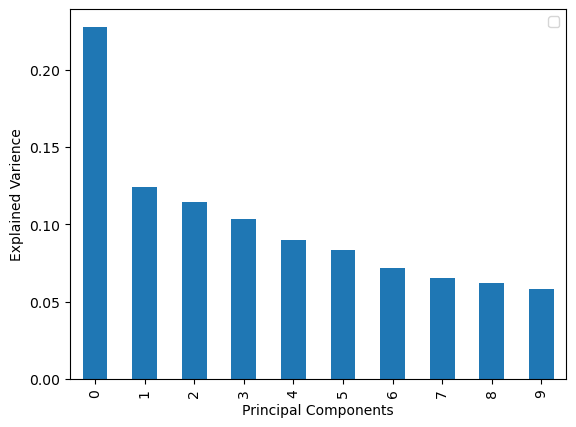

In [6]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')  
plt.ylabel('Explained Varience')